In [7]:
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# import seaborn as sns
# sns.set(style="ticks", context="talk")
# plt.style.use("dark_background")

import joblib
model = joblib.load('income_model.sav')

from utils import load_ttsplit, xyw

train,test = load_ttsplit()
x_train,y_train,w_train = xyw(train)
x_test,y_test,w_test = xyw(test)
# y_train_hat = model.predict_proba(x_train)[:,1]
# y_test_hat = model.predict_proba(x_test)[:,1]

print("What scoring do you wish to use to compute importances? (if blank, 'f1' will be used)")
s = input()
if len(s) == 0:
    s = 'f1'

In [18]:
# make roc_auc, precision_recall, feature importance plots
def plot_importance(result,cols,fig_x=20,fig_y=8,save_path=None):
    sorted_idx = result.importances_mean.argsort()

    plt.figure(figsize=(fig_x,fig_y))
    plt.boxplot(result.importances[sorted_idx].T,
               vert=False, labels=cols[sorted_idx])

    if save_path:
        plt.savefig(save_path)

In [9]:
print("Computing result for test set. It might take a while.")
result_test = permutation_importance(model,x_test,y_test,scoring='f1')

Computing result for test set. It might take a while.


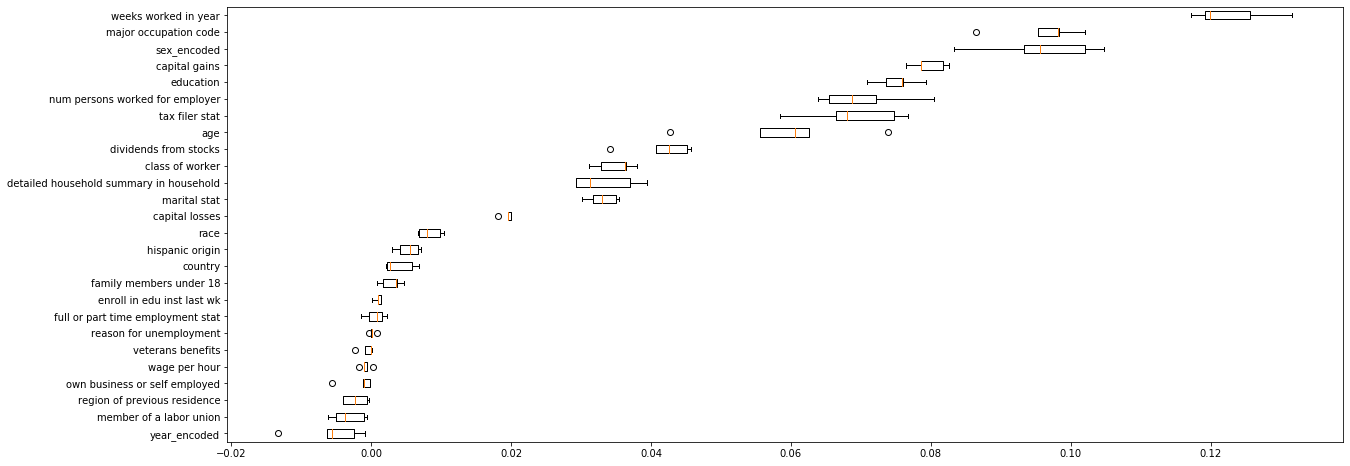

In [19]:
plot_importance(result_test,cols=x_test.columns,save_path='importance_test.png')